## Importing the Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import plotly.graph_objs as go
from xgboost import XGBRegressor
import seaborn as sns
sns.set()

## Loading Data

In [2]:
raw_data = pd.read_csv('1.02 CHITALKHALI STATION.csv')
raw_data.head()

,YEAR,MONTH,DAY,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH,LOW
0,2018,1,1,101.16,15.94,23.65,0.88,4.28,80.56,15.39,12.484,6.384,1.60491,-1.18509
1,2018,1,2,101.01,16.66,21.85,1.90,7.76,88.19,16.49,12.600,6.244,1.47491,-1.28509
2,2018,1,3,101.18,14.15,23.23,0.25,6.27,81.88,13.83,12.634,6.114,1.56491,-1.36509
3,2018,1,4,101.37,11.59,20.83,0.35,5.81,79.12,11.65,12.724,5.921,1.48491,-1.38509
4,2018,1,5,101.22,12.25,21.27,0.00,6.10,83.00,10.40,12.834,5.768,1.39491,-1.48509


## Handling Null Values

In [3]:
raw_data.isnull().sum()

YEAR                 0
MONTH                0
DAY                  0
SURFACE PRESSURE     0
DEW POINT            0
TEMPERATURE          0
PRECIPITATION        0
MAX WIND SPD         0
RELATIVE HUMIDITY    0
MIN TEMP             0
N_ICE EXTENT         0
S_ICE EXTENT         0
HIGH                 0
LOW                  0
dtype: int64

In [4]:
data_no_mv = raw_data.dropna(axis=0)
data_no_mv.describe(include='all')

,YEAR,MONTH,DAY,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH,LOW
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,2019.500342,6.522930,15.729637,100.805934,21.647741,29.102663,11.786988,6.234517,80.616051,22.478138,10.313081,11.245162,1.854136,-1.074376
std,1.118111,3.449884,8.803105,0.553406,5.192833,3.572199,21.751171,2.266376,9.888462,5.214499,3.545433,5.736673,0.738784,0.404510
min,2018.000000,1.000000,1.000000,99.110000,7.220000,18.960000,0.000000,1.580000,46.500000,8.830000,3.793000,2.200000,0.214910,-2.079000
25%,2019.000000,4.000000,8.000000,100.370000,17.560000,26.850000,0.000000,4.710000,73.880000,18.470000,6.780000,5.555000,1.314910,-1.369000
50%,2020.000000,7.000000,16.000000,100.860000,23.510000,29.950000,2.320000,5.980000,83.440000,24.870000,11.207000,12.006000,1.762000,-1.085090
75%,2020.000000,10.000000,23.000000,101.270000,26.190000,31.200000,15.110000,7.340000,88.560000,26.730000,13.539000,16.989000,2.420000,-0.785090
max,2021.000000,12.000000,31.000000,101.900000,27.850000,38.740000,176.380000,22.950000,94.810000,28.650000,15.071000,19.062000,3.977000,1.714910


## Distribution Check and Dealing With Outliers

In [5]:
df = data_no_mv

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


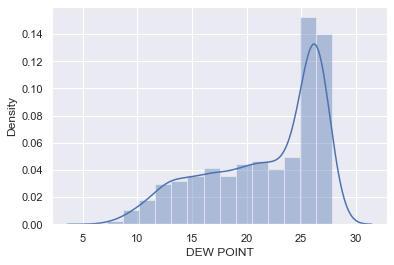

In [6]:
sns.distplot(df['DEW POINT'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


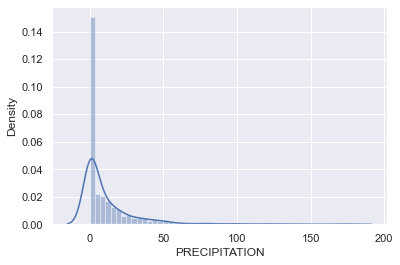

In [7]:
sns.distplot(df['PRECIPITATION'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


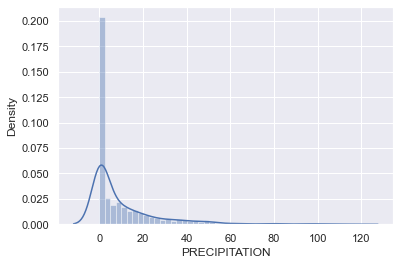

In [8]:
q = df['PRECIPITATION'].quantile(0.99)
data_1 = df[df['PRECIPITATION']<q]
sns.distplot(data_1['PRECIPITATION'])
plt.show()

In [9]:
data_cleaned = data_1.reset_index(drop=True)

In [10]:
data_cleaned = data_cleaned.drop(['HIGH'],axis=1)
data_cleaned.describe(include='all')

,YEAR,MONTH,DAY,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,LOW
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,2019.504841,6.511065,15.737206,100.812994,21.596162,29.103223,10.405422,6.196065,80.486501,22.432282,10.339373,11.197965,-1.077349
std,1.119647,3.462635,8.812626,0.551256,5.194549,3.589857,16.945718,2.238856,9.856531,5.221500,3.549413,5.745249,0.404250
min,2018.000000,1.000000,1.000000,99.110000,7.220000,18.960000,0.000000,1.580000,46.500000,8.830000,3.793000,2.200000,-2.079000
25%,2019.000000,4.000000,8.000000,100.380000,17.512500,26.802500,0.000000,4.700000,73.750000,18.440000,6.836500,5.495500,-1.375090
50%,2020.000000,6.500000,16.000000,100.860000,23.325000,29.970000,2.200000,5.960000,83.310000,24.810000,11.291000,11.870000,-1.085090
75%,2021.000000,10.000000,23.000000,101.270000,26.177500,31.220000,14.262500,7.270000,88.500000,26.710000,13.546750,16.984000,-0.793250
max,2021.000000,12.000000,31.000000,101.900000,27.850000,38.740000,115.830000,22.950000,94.810000,28.650000,15.071000,19.062000,1.714910


## Setting Targets(Labels) and Inputs

In [11]:
targets = data_cleaned['LOW']
inputs = data_cleaned.drop(['LOW'],axis=1)

## Polynomial Regression

### Scaling the data

In [12]:
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

### Train-Test Split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=22)

### Model

In [14]:
poly = PolynomialFeatures(degree=2)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

### Training

In [15]:
reg_pol = LinearRegression()
reg_pol.fit(x_train_trans,y_train)
Train_score_PR = reg_pol.score(x_train_trans,y_train)
print("Training Score: ",Train_score_PR)

Training Score:  0.5845965965173742


### Testing

In [16]:
y_pred_pol = reg_pol.predict(x_test_trans)

In [17]:
Test_score_PR = r2_score(y_test,y_pred_pol)
print("Testing Score: ",Test_score_PR)

Testing Score:  0.5347644657582391


In [18]:
mse = mean_squared_error(y_test, y_pred_pol)
print("MSE :",mse)
print("RMSE :",mse*(1/2.0))

MSE : 0.07325603903102273
RMSE : 0.03662801951551137


### Visulizing Predictions

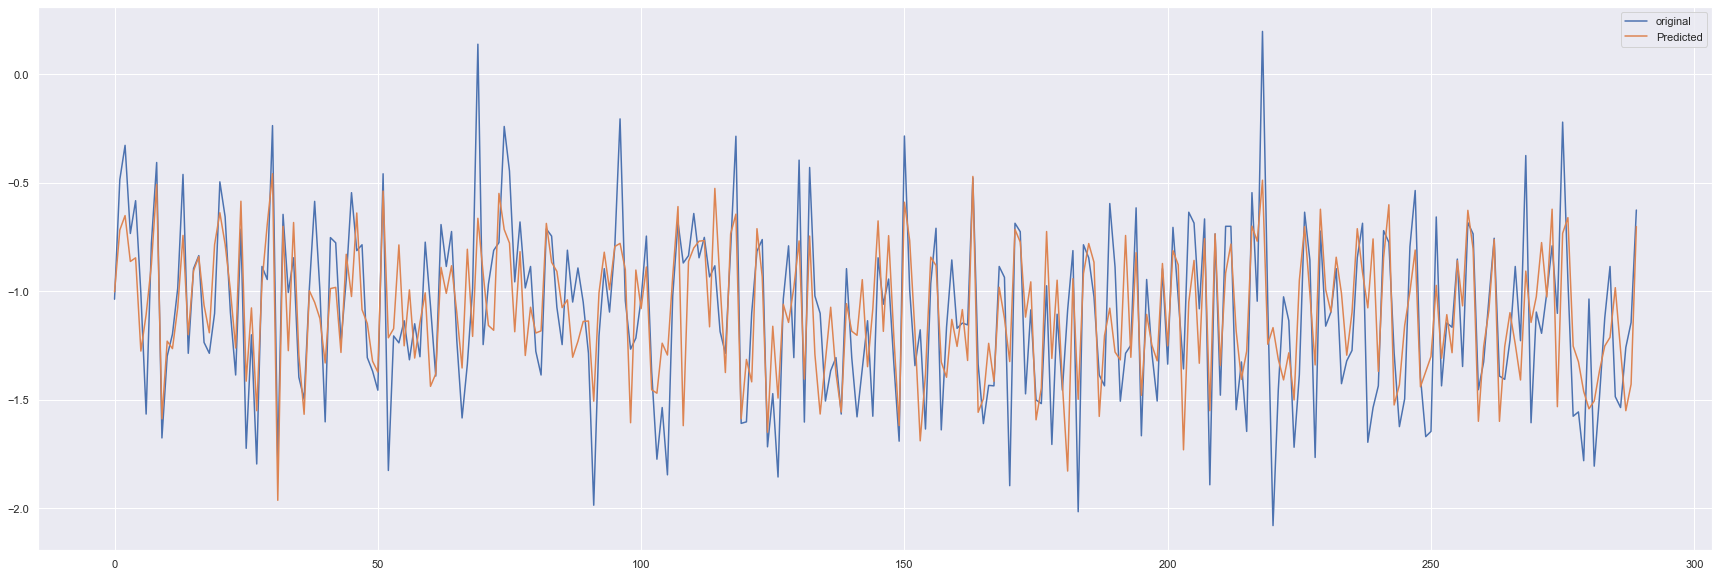

In [19]:
x_ax = range(len(y_test))
plt.figure(figsize=(30,10))
plt.plot(x_ax, y_test,label="original")
plt.plot(x_ax, y_pred_pol, label="Predicted")
plt.legend()
plt.show()

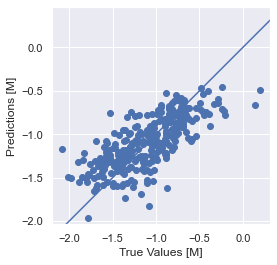

In [20]:
y_pred_pol = reg_pol.predict(x_test_trans).flatten()
plt.scatter(y_test, y_pred_pol)
plt.xlabel('True Values [M]')
plt.ylabel('Predictions [M]')
plt.axis('equal')
plt.axis('square')

_ = plt.plot([-100, 100], [-100, 100])
plt.show()

## Support Vector Regression

### Scaling the data

In [21]:
df_svr = data_cleaned
scaler=MinMaxScaler()
scaler.fit(inputs)
inputs_scaled_SVR = scaler.transform(inputs)

### Train-Test Split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled_SVR, targets, test_size=0.2, random_state=22)

### Model and Training

In [23]:
svr = SVR(kernel='rbf',C=70,epsilon=0.1)
svr.fit(x_train,y_train)
Train_score_SVR = svr.score(x_train,y_train)
print("Training Score: ",Train_score_SVR)

Training Score:  0.7820165963740366


### Testing

In [24]:
y_pred_svr = svr.predict(x_test)

In [25]:
Test_score_SVR = r2_score(y_test,y_pred_svr)
print("Testing Score: ",Test_score_SVR)

Testing Score:  0.7022915448665088


In [26]:
mse = mean_squared_error(y_test, y_pred_svr)
print("MSE :",mse)
print("RMSE :",mse*(1/2.0))

MSE : 0.04687720649857205
RMSE : 0.023438603249286025


### Visualizing Predictions

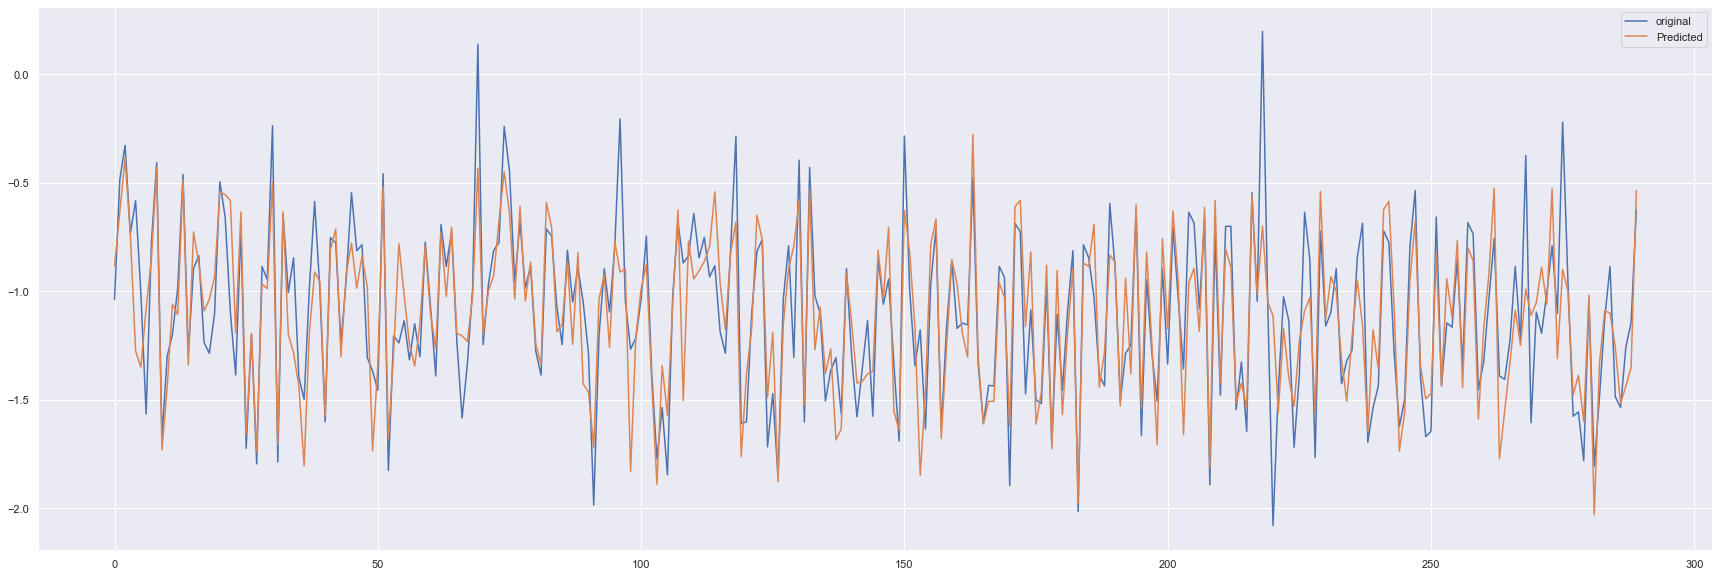

In [27]:
x_ax = range(len(y_test))
plt.figure(figsize=(30,10))
plt.plot(x_ax, y_test,label="original")
plt.plot(x_ax, y_pred_svr, label="Predicted")
plt.legend()
plt.show()

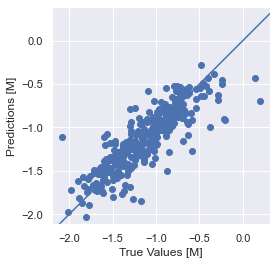

In [28]:
y_pred_svr = svr.predict(x_test).flatten()
plt.scatter(y_test, y_pred_svr)
plt.xlabel('True Values [M]')
plt.ylabel('Predictions [M]')
plt.axis('equal')
plt.axis('square')

_ = plt.plot([-100, 100], [-100, 100])
plt.show()

## XGB Regressor

### Train-Test Split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.15, random_state=22)

### Model

In [30]:
xgbr = XGBRegressor(verbosity=0)
print(xgbr)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)


### Training

In [31]:
xgbr.fit(x_train,y_train)
Train_score_XGB = xgbr.score(x_train,y_train)
print("Training Score: ",Train_score_XGB)

Training Score:  0.9984952831492261


### Testing

In [32]:
y_pred_xgbr = xgbr.predict(x_test)
Test_score_XGB =  r2_score(y_test,y_pred_xgbr)
print("Training Score: ",Test_score_XGB)

Training Score:  0.834573956863683


In [33]:
mse = mean_squared_error(y_test, y_pred_xgbr)
print("MSE :",mse)
print("RMSE :",mse*(1/2.0))

MSE : 0.025428307888958966
RMSE : 0.012714153944479483


### Visualizing Predictions

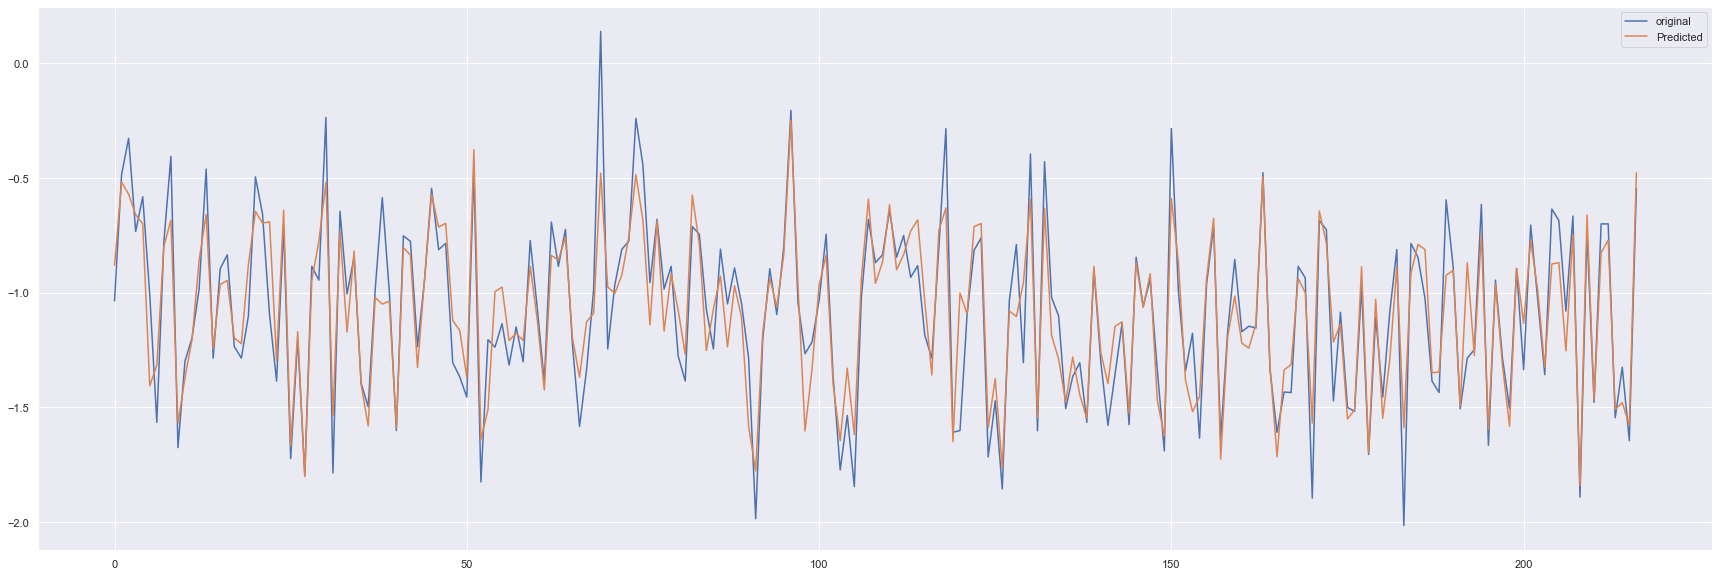

In [34]:
x_ax = range(len(y_test))
plt.figure(figsize=(30,10))
plt.plot(x_ax, y_test,label="original")
plt.plot(x_ax, y_pred_xgbr, label="Predicted")
plt.legend()
plt.show()

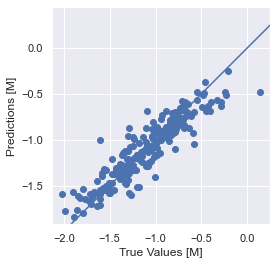

In [35]:
y_pred_xgbr = xgbr.predict(x_test).flatten()
plt.scatter(y_test, y_pred_xgbr)
plt.xlabel('True Values [M]')
plt.ylabel('Predictions [M]')
plt.axis('equal')
plt.axis('square')

_ = plt.plot([-100, 100], [-100, 100])
plt.show()

## Random Forest Regression Model

### Train-Test Split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=22)

### Model

In [37]:
rfr = RandomForestRegressor(n_estimators=1000,random_state=0)

### Training

In [38]:
rfr.fit(x_train,y_train)
Train_score_RFR = rfr.score(x_train,y_train)
print("Training Score: ",Train_score_RFR)

Training Score:  0.9587552858385107


### Testing

In [39]:
y_pred_rfr = rfr.predict(x_test)
Test_score_RFR =  r2_score(y_test,y_pred_rfr)
print("Testing Score: ",Test_score_RFR)

Testing Score:  0.7256289067080446


In [40]:
mse = mean_squared_error(y_test, y_pred_rfr)
print("MSE :",mse)
print("RMSE :",mse*(1/2.0))

MSE : 0.043202502904120796
RMSE : 0.021601251452060398


### Visualizing Predictions

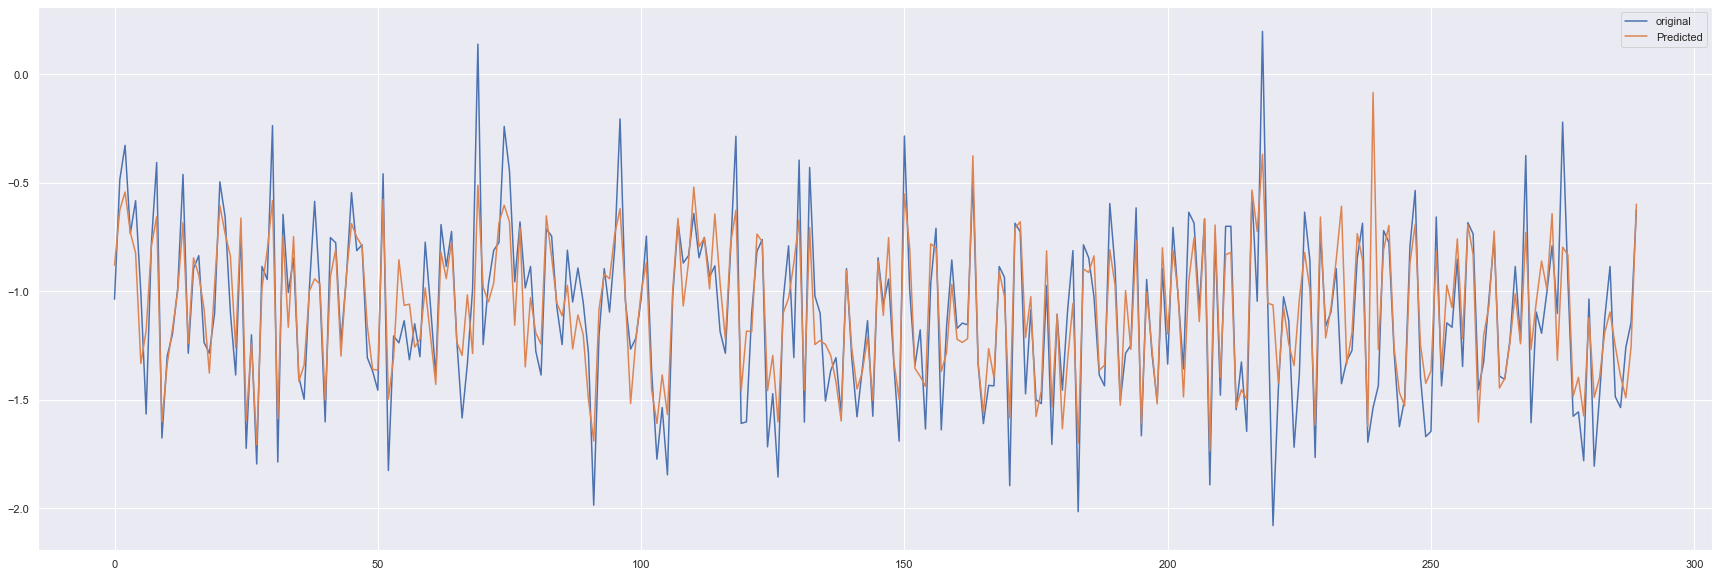

In [41]:
x_ax = range(len(y_test))
plt.figure(figsize=(30,10))
plt.plot(x_ax, y_test,label="original")
plt.plot(x_ax, y_pred_rfr, label="Predicted")
plt.legend()
plt.show()

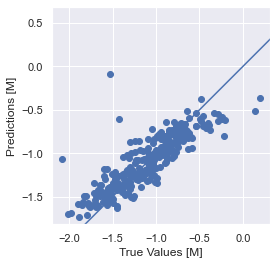

In [42]:
y_pred_rfr = rfr.predict(x_test).flatten()
plt.scatter(y_test, y_pred_rfr)
plt.xlabel('True Values [M]')
plt.ylabel('Predictions [M]')
plt.axis('equal')
plt.axis('square')

_ = plt.plot([-100, 100], [-100, 100])
plt.show()